#### Author: Balaji Kartheek

### Fields in the dataset:


In [71]:
print('''

Name: Name of cereal mfr: Manufacturer of cereal  A = American Home Food Products;
G = General Mills
K = Kelloggs
N = Nabisco
P = Post
Q = Quaker Oats
R = Ralston Purina
type:
cold
hot
calories: calories per serving
protein: grams of protein
fat: grams of fat
sodium: milligrams of sodium
fiber: grams of dietary fiber
carbo: grams of complex carbohydrates
sugars: grams of sugars
potass: milligrams of potassium
vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
shelf: display shelf (1, 2, or 3, counting from the floor)
weight: weight in ounces of one serving
cups: number of cups in one serving
rating: a rating of the cereals (Possibly from Consumer Reports?)

Inspiration
Eat too much sugary cereal? Ruin your appetite with this dataset!
''')



Name: Name of cereal mfr: Manufacturer of cereal  A = American Home Food Products;
G = General Mills
K = Kelloggs
N = Nabisco
P = Post
Q = Quaker Oats
R = Ralston Purina
type:
cold
hot
calories: calories per serving
protein: grams of protein
fat: grams of fat
sodium: milligrams of sodium
fiber: grams of dietary fiber
carbo: grams of complex carbohydrates
sugars: grams of sugars
potass: milligrams of potassium
vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
shelf: display shelf (1, 2, or 3, counting from the floor)
weight: weight in ounces of one serving
cups: number of cups in one serving
rating: a rating of the cereals (Possibly from Consumer Reports?)

Inspiration
Eat too much sugary cereal? Ruin your appetite with this dataset!



In [5]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_excel(r"C:\Users\tbala\Downloads\Cereals1.xls")
# dataset link = "https://www.kaggle.com/datasets/crawford/80-cereals"

In [7]:
data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


### 1) Create a table with the 5-number summary of all the numeric attributes

In [8]:
data.describe()   # describe() function to get the 5-number summary of all the numeric attributes

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.723684,6.934211,93.657895,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,4.160444,4.473136,68.502565,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


### 2) For each of the numeric attributes (proteins upto vitamins) , identify and replace all missing data(indicated with -1) with the arithmetic mean of the attribute.



In [9]:
data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


### checking missing values for every numeric attribute

In [10]:
data[data["protein"]==-1]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating


### there are no null values in protein column

In [11]:
data[data["fat"]==-1]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating


### there are no null values in fat column

In [12]:
data[data["sodium"]==-1]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating


### there are no null values in sodium column

In [13]:
data[data["fiber"]==-1]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating


### there are no null values in fiber column

In [44]:
data[data["carbo"]==-1]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
56,Quaker_Oatmeal,Q,H,100,5,2,0,2.7,-1.0,6.934211,110,0,1,1.0,0.67,50.828392


In [64]:
carbo_mean = data["carbo"].mean()
carbo_data = data["carbo"].replace(to_replace =-1, value = np.nan)

In [65]:
carbo_data

0      8.0
1      7.0
2      8.0
3     14.0
4     10.5
      ... 
71    21.0
72    13.0
73    17.0
74    17.0
75    16.0
Name: carbo, Length: 76, dtype: float64

In [66]:
carbo_data = data["carbo"].replace(to_replace =-1, value = carbo_mean)

In [67]:
data["carbo"]=carbo_data

In [68]:
data["carbo"][56]

14.723684210526315

In [69]:
data[data["carbo"]==-1]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating


In [31]:
data[data["sugars"]==-1]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
56,Quaker_Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [32]:
sugars_mean = data["sugars"].mean()
sugars_data = data["sugars"].replace(to_replace =-1, value = np.nan)

In [37]:
sugars_data

0      8.0
1      5.0
2      0.0
3      8.0
4     10.0
      ... 
71     3.0
72    12.0
73     3.0
74     3.0
75     8.0
Name: sugars, Length: 76, dtype: float64

In [33]:
sugars_data = data["sugars"].replace(to_replace =-1, value = sugars_mean)

In [34]:
data["sugars"]=sugars_data   

In [35]:
data[data["sugars"]==-1]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating


In [36]:
data["sugars"][56]

6.934210526315789

In [54]:
data[data["potass"]==-1]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,-1,25,3,1.0,0.75,34.384843
19,Cream_of_Wheat_(Quick),N,H,100,3,0,80,1.0,21.0,0.0,-1,0,2,1.0,1.00,64.533816


In [55]:
potass_mean = data["potass"].mean()
potass_data = data["potass"].replace(to_replace =-1, value = np.nan)

In [56]:
potass_data = data["potass"].replace(to_replace =-1, value = potass_mean)

In [57]:
data["potass"]=potass_data

In [58]:
data["potass"][19]

93.65789473684211

In [59]:
data["potass"][3]

93.65789473684211

In [63]:
data[data["vitamins"]==-1]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating


### 3) Create a table with the 5-number summary of all the numeric attributes after treating missing values. Do you think the strategy used in dealing with missing values was effective?
  

 

In [70]:
data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.930575,7.038608,96.148892,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,3.737575,4.377048,66.688658,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.861842,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


### Yes it is important to deal with the missing values as the mean ,quartiles  changes 

### 4) For each of the numeric attributes (proteins upto vitamins), identify and replace all noisy data with the median of attribute.


<AxesSubplot:>

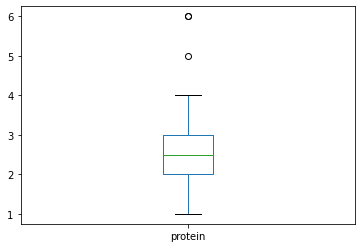

In [386]:
data["protein"].plot.box()

In [387]:
Q1 = data.protein.quantile(0.25)
Q3 = data.protein.quantile(0.75)
Q1,Q3

(2.0, 3.0)

In [388]:
protein_IQR = Q3-Q1
protein_lower = Q1-1.5*protein_IQR
protein_upper =Q3+1.5*protein_IQR
protein_median = data.protein.median()
protein_IQR,protein_lower,protein_upper

(1.0, 0.5, 4.5)

In [389]:
data[(data.protein<protein_lower) | (data.protein>protein_upper)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
10,Cheerios,G,C,110,6,2,290,2.0,17.000000,1.000000,105.0,25,1,1.0,1.25,50.764999
56,Quaker_Oatmeal,Q,H,100,5,2,0,2.7,14.723684,6.934211,110.0,0,1,1.0,0.67,50.828392
66,Special_K,K,C,110,6,0,230,1.0,16.000000,3.000000,55.0,25,1,1.0,1.00,53.131324


In [390]:
# replaces the condition with the protein_median
data.protein = np.where((data.protein<protein_lower) | (data.protein>protein_upper),protein_median,data.protein)

<AxesSubplot:>

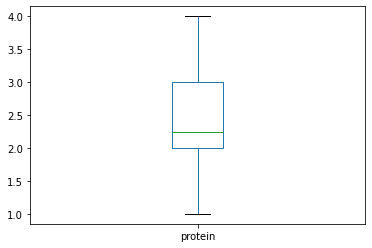

In [391]:
data.protein.plot.box()

<AxesSubplot:>

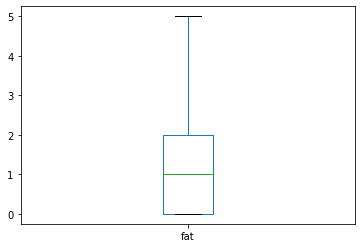

In [393]:
data["fat"].plot.box()

In [394]:
Q1 = data.fat.quantile(0.25)
Q3 = data.fat.quantile(0.75)
Q1,Q3

(0.0, 2.0)

In [395]:
fat_IQR = Q3-Q1
fat_lower = Q1-1.5*fat_IQR
fat_upper =Q3+1.5*fat_IQR
fat_median = data.fat.median()
fat_IQR,fat_lower,fat_upper

(2.0, -3.0, 5.0)

In [396]:
data[(data.fat<fat_lower) | (data.fat>fat_upper)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating


### there are no outliers for fat

<AxesSubplot:>

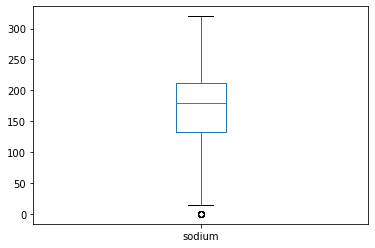

In [402]:
data["sodium"].plot.box()

In [403]:
Q1 = data.sodium.quantile(0.25)
Q3 = data.sodium.quantile(0.75)
Q1,Q3

(132.5, 212.5)

In [404]:
sodium_IQR = Q3-Q1
sodium_lower = Q1-1.5*sodium_IQR
sodium_upper =Q3+1.5*sodium_IQR
sodium_median = data.sodium.median()
sodium_IQR,sodium_lower,sodium_upper,sodium_median

(80.0, 12.5, 332.5, 180.0)

In [405]:
data[(data.sodium<sodium_lower) | (data.sodium>sodium_upper)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
25,Frosted_Mini-Wheats,K,C,100,3.0,0,0,3.0,14.000000,7.000000,100.0,25,2,1.00,0.80,58.345141
42,Maypo,A,H,100,4.0,1,0,0.0,16.000000,3.000000,95.0,25,2,1.00,1.00,54.850917
53,Puffed_Rice,Q,C,50,1.0,0,0,0.0,13.000000,0.000000,15.0,0,3,0.50,1.00,60.756112
54,Puffed_Wheat,Q,C,50,2.0,0,0,1.0,10.000000,0.000000,50.0,0,3,0.50,1.00,63.005645
56,Quaker_Oatmeal,Q,H,100,2.5,2,0,2.7,14.723684,6.934211,110.0,0,1,1.00,0.67,50.828392
59,Raisin_Squares,K,C,90,2.0,0,0,2.0,15.000000,6.000000,110.0,25,3,1.00,0.50,55.333142
62,Shredded_Wheat,N,C,80,2.0,0,0,3.0,16.000000,0.000000,95.0,0,1,0.83,1.00,68.235885
63,Shredded_Wheat_'n'Bran,N,C,90,3.0,0,0,4.0,19.000000,0.000000,140.0,0,1,1.00,0.67,74.472949
64,Shredded_Wheat_spoon_size,N,C,90,3.0,0,0,3.0,20.000000,0.000000,120.0,0,1,1.00,0.67,72.801787


In [406]:
data.sodium = np.where((data.sodium<sodium_lower) | (data.sodium>sodium_upper),sodium_median,data.sodium)

<AxesSubplot:>

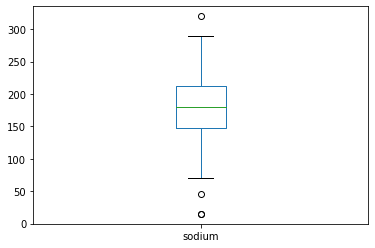

In [407]:
data.sodium.plot.box()

### the standard deviation of sodium is very high so there are still outliers for sodium

<AxesSubplot:>

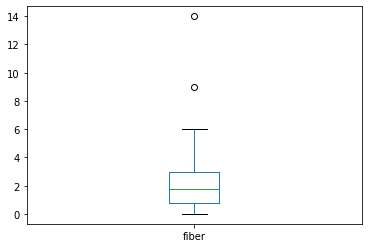

In [408]:
data["fiber"].plot.box()

In [409]:
Q1 = data.fiber.quantile(0.25)
Q3 = data.fiber.quantile(0.75)
Q1,Q3


(0.75, 3.0)

In [410]:
fiber_IQR = Q3-Q1
fiber_lower = Q1-1.5*fiber_IQR
fiber_upper =Q3+1.5*fiber_IQR
fiber_median = data.fiber.median()
fiber_IQR,fiber_lower,fiber_upper

(2.25, -2.625, 6.375)

In [411]:




data[(data.fiber<fiber_lower) | (data.fiber>fiber_upper)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,All-Bran,K,C,70,4.0,1,260.0,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4.0,0,140.0,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912


In [412]:
data.fiber = np.where((data.fiber<fiber_lower) | (data.fiber>fiber_upper),fiber_median,data.fiber)

<AxesSubplot:>

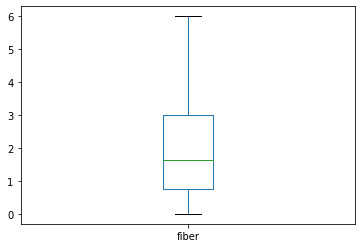

In [413]:
data["fiber"].plot.box()

<AxesSubplot:>

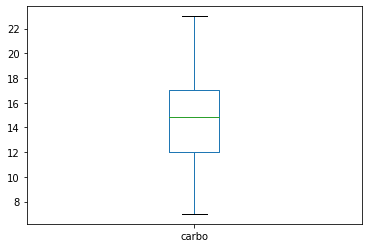

In [414]:
data["carbo"].plot.box()

In [415]:
Q1 = data.carbo.quantile(0.25)
Q3 = data.carbo.quantile(0.75)
Q1,Q3


(12.0, 17.0)

In [416]:
carbo_IQR = Q3-Q1
carbo_lower = Q1-1.5*carbo_IQR
carbo_upper =Q3+1.5*carbo_IQR
carbo_median = data.carbo.median()
carbo_IQR,carbo_lower,carbo_upper

(5.0, 4.5, 24.5)

In [417]:
data[(data.carbo<carbo_lower) | (data.carbo>carbo_upper)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating


In [418]:
data.carbo = np.where((data.carbo<carbo_lower) | (data.carbo>carbo_upper),carbo_median,data.carbo)

<AxesSubplot:>

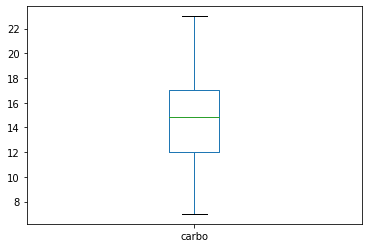

In [419]:
data.carbo.plot.box()

<AxesSubplot:>

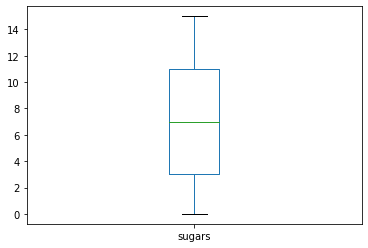

In [420]:
data.sugars.plot.box()

In [421]:
Q1 = data.sugars.quantile(0.25)
Q3 = data.sugars.quantile(0.75)
Q1,Q3


(3.0, 11.0)

In [422]:
sugars_IQR = Q3-Q1
sugars_lower = Q1-1.5*sugars_IQR
sugars_upper =Q3+1.5*sugars_IQR
sugars_median = data.sugars.median()
sugars_IQR,sugars_lower,sugars_upper

(8.0, -9.0, 23.0)

In [423]:
data[(data.sugars<sugars_lower) | (data.sugars>sugars_upper)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating


In [424]:
# there are no outliers

<AxesSubplot:>

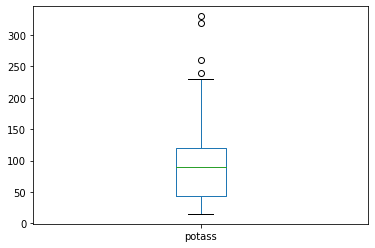

In [425]:
data["potass"].plot.box()

In [426]:
Q1 = data.potass.quantile(0.25)
Q3 = data.potass.quantile(0.75)
Q1,Q3


(43.75, 120.0)

In [427]:

potass_IQR = Q3-Q1
potass_lower = Q1-1.5*potass_IQR
potass_upper =Q3+1.5*potass_IQR
potass_median = data.potass.median()
potass_IQR,potass_lower,potass_upper

(76.25, -70.625, 234.375)

In [428]:
data[(data.potass<potass_lower) | (data.potass>potass_upper)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,All-Bran,K,C,70,4.0,1,260.0,1.75,7.0,5.0,320.0,25,3,1.00,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4.0,0,140.0,1.75,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
51,Post_Nat._Raisin_Bran,P,C,120,3.0,1,200.0,6.00,11.0,14.0,260.0,25,3,1.33,0.67,37.840594
57,Raisin_Bran,K,C,120,3.0,1,210.0,5.00,14.0,12.0,240.0,25,2,1.33,0.75,39.259197


In [429]:
data.potass = np.where((data.potass<potass_lower) | (data.potass>potass_upper),potass_median,data.potass)

<AxesSubplot:>

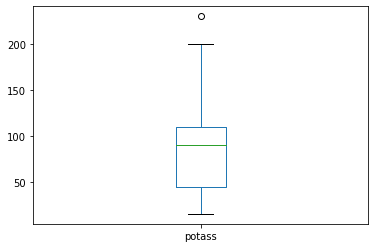

In [430]:
data.potass.plot.box()

### the standard deviation of potass is very high so there are still outliers for sodium

<AxesSubplot:>

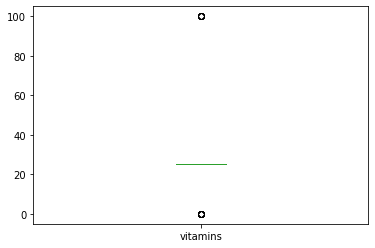

In [431]:
data["vitamins"].plot.box()





### 5) Create a table with the 5-number summary of all the numeric attributes after treating noisy values. Do you think the strategy used in dealing with noisy values was effective?



In [432]:
data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.401316,1.013158,181.381579,1.792105,14.930575,7.038608,85.754155,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,0.875670,1.013159,60.186370,1.520220,3.737575,4.377048,48.049515,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,15.000000,0.000000,7.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,147.500000,0.750000,12.000000,3.000000,43.750000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.250000,1.000000,180.000000,1.625000,14.861842,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,110.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,4.000000,5.000000,320.000000,6.000000,23.000000,15.000000,230.000000,100.000000,3.000000,1.500000,1.500000,93.704912


### yes in preprocessing stage we handle the noisy data to get accurate results as herer dataset has less elements we ill handle it by replacing with median so 5 number summary will also change

### 6) Cross tabulate the type of cereal (hot vs cold) against the manufacturer

In [435]:
pd.crosstab(data.type,data.mfr,margins=True, margins_name="Total")

# C for cold and H for Hot

mfr,A,G,K,N,P,Q,R,Total
type,,,,,,,,
C,0,22,23,4,9,7,8,73
H,1,0,0,1,0,1,0,3
Total,1,22,23,5,9,8,8,76


### 7) Which is the cereal with the best rating, worst rating?

In [436]:
best_rating  = data.rating.max()

In [437]:
data[data.rating==best_rating]["name"]

2    All-Bran_with_Extra_Fiber
Name: name, dtype: object

### All-Bran_with_Extra_Fiber cereal has the best rating

In [438]:
worst_rating  = data.rating.min()
worst_rating

18.042851

In [439]:


print(data[data.rating==worst_rating]["name"])
data[data.rating==worst_rating]

9    Cap'n'Crunch
Name: name, dtype: object


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
9,Cap'n'Crunch,Q,C,120,1.0,2,220.0,0.0,12.0,12.0,35.0,25,2,1.0,0.75,18.042851


### Cap'n'Crunch has the Worst Rating

### 8) Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals. 

Text(0.5, 1.0, 'Rating of hot vs. cold cereals.')

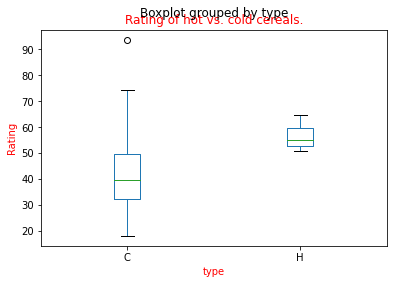

In [440]:
data.boxplot(by='type',column=['rating'],grid=False)
plt.xlabel("type",color='r')
plt.ylabel("Rating",color='r')
plt.title("Rating of hot vs. cold cereals.",color='r')

### 9) Is there a relation between sugars, calories, carbs, and fat?


In [441]:
relation_data = pd.DataFrame({
    "sugars" : data.sugars,
    "calories": data.calories,
    "carbo": data.carbo,
    "fat": data.fat
})

In [442]:
relation_data

,sugars,calories,carbo,fat
0,8.0,120,8.0,5
1,5.0,70,7.0,1
2,0.0,50,8.0,0
3,8.0,110,14.0,2
4,10.0,110,10.5,2
...,...,...,...,...
71,3.0,110,21.0,1
72,12.0,110,13.0,1
73,3.0,100,17.0,1
74,3.0,100,17.0,1


In [443]:
relation_data.corr()

,sugars,calories,carbo,fat
sugars,1.000000,0.574304,-0.501056,0.300349
calories,0.574304,1.000000,0.207615,0.510630
carbo,-0.501056,0.207615,1.000000,-0.312341
fat,0.300349,0.510630,-0.312341,1.000000


### calories and sugars , calories and fat are posively moderatively correlated sugars and cabohydrates are moderatively negatively correlated

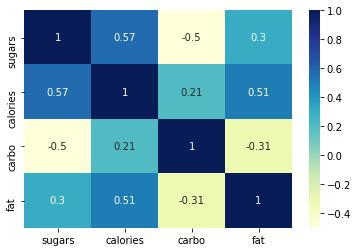

In [446]:
corre_plot = data[['sugars', 'calories', 'carbo', 'fat']]

dataplot = sns.heatmap(corre_plot.corr(), cmap="YlGnBu", annot=True)

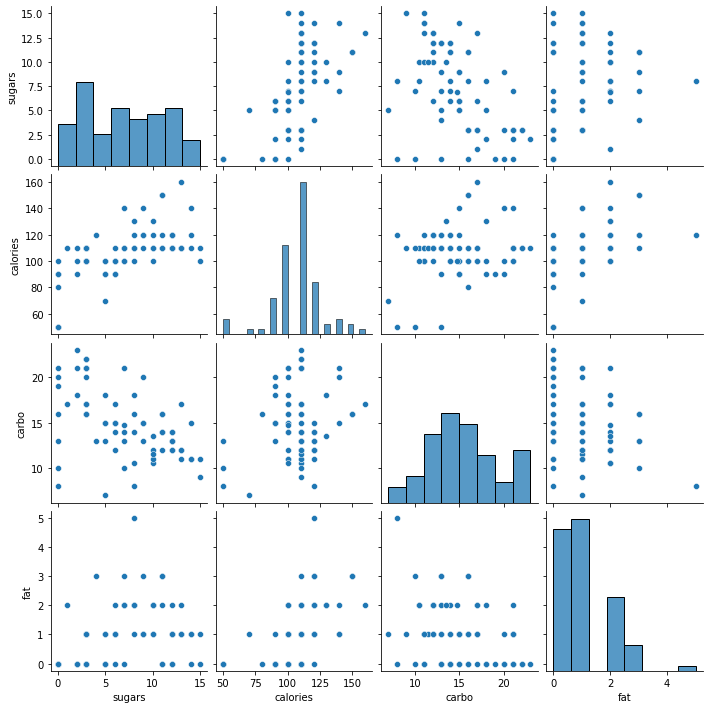

In [447]:
sns.pairplot(relation_data,vars=['sugars','calories','carbo','fat'])

### 10) Which manufacturers produce cereal with highest calories?

In [448]:
highest_calories = data.calories.max()

In [449]:
print(data[data.calories==highest_calories]["mfr"])
data[data.calories==highest_calories]

45    K
Name: mfr, dtype: object


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
45,Mueslix_Crispy_Blend,K,C,160,3.0,2,150.0,3.0,17.0,13.0,160.0,25,3,1.5,0.67,30.313351


### K manufacturers produce cereal with highest calories

### 11) Use correlation tests and visualization to identify if the two variables calories and consumer rating associated ?


In [450]:
data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3.0,5,15.0,2.00,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4.0,1,260.0,1.75,7.0,5.0,90.000000,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4.0,0,140.0,1.75,8.0,0.0,90.000000,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2.0,2,200.0,1.00,14.0,8.0,93.657895,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2.0,2,180.0,1.50,10.5,10.0,70.000000,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2.0,1,250.0,0.00,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1.0,1,140.0,0.00,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3.0,1,230.0,3.00,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3.0,1,200.0,3.00,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


In [451]:
correlation = data.calories.corr(data.rating)
correlation

-0.6743360496799723

### the correlation value is -0.6743360496799723 which indicates they are negatively(inversely) correlated

          calories    rating
calories  1.000000 -0.674336
rating   -0.674336  1.000000


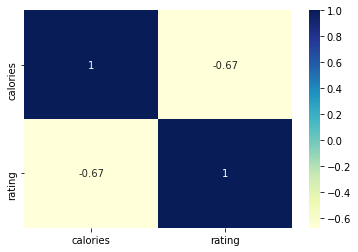

In [329]:
corre_plot = data[[ 'calories', 'rating']]
print(corre_plot.corr())
dataplot = sns.heatmap(corre_plot.corr(), cmap="YlGnBu", annot=True)
plt.show()

### by seeing we can say that calories and rating are moderately negatively correlated

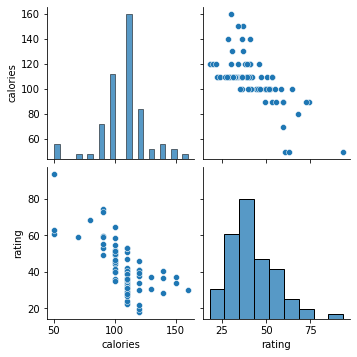

In [452]:
sns.pairplot(data,vars=['calories','rating'])

### 12) Use correlation tests and visualization to identify if the two variables shelf and consumer rating associated?
 

In [354]:
correlation = data.shelf.corr(data.rating)
correlation

0.0019730207509652386

In [457]:
data['shelfNum'] = pd.factorize(data['shelf'], sort = True)[0]

The value of correlation coefficient b/w 'shelfNum' and 'rating' :
0.0019730207509652225


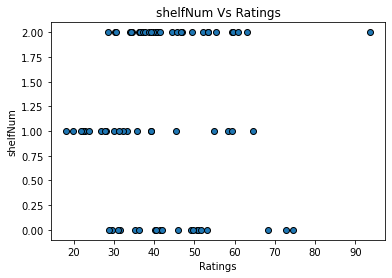

In [458]:
print("The value of correlation coefficient b/w 'shelfNum' and 'rating' :")
print(data['shelfNum'].corr(data['rating']))

plt.xlabel('Ratings')
plt.ylabel('shelfNum')
plt.title("shelfNum Vs Ratings")
plt.scatter(data.rating, data.shelfNum, edgecolor = 'k');

           shelf    rating
shelf   1.000000  0.001973
rating  0.001973  1.000000


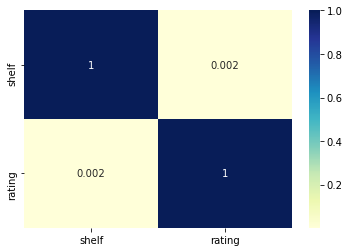

In [331]:
corre_plot = data[[ 'shelf','rating']]
print(corre_plot.corr())
dataplot = sns.heatmap(corre_plot.corr(), cmap="YlGnBu", annot=True)
plt.show()

### as here the value is 0.002 which is less than 0.005 these varriables are significant and the correlation exists in between them

### 13) Is there a relation between manufacturer and rating?

In [467]:
data["manufacturer"]= pd.factorize(data["mfr"],sort=True)[0]

In [473]:
print("The value of correlation coefficient b/w 'manufacturer' and 'rating' :")
print(data['manufacturer'].corr(data['rating']))

The value of correlation coefficient b/w 'manufacturer' and 'rating' :
0.14028800949196574


The value of correlation coefficient b/w 'manufacturer' and 'rating' :
0.14028800949196574


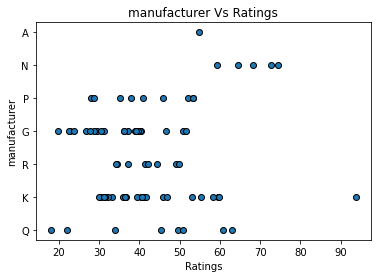

In [474]:
print("The value of correlation coefficient b/w 'manufacturer' and 'rating' :")
print(data['manufacturer'].corr(data['rating']))

plt.xlabel('Ratings')
plt.ylabel('manufacturer')
plt.title("manufacturer Vs Ratings")
plt.scatter(data.rating, data.mfr, edgecolor = 'k');

### 14) Which nutrients are essential for a good rating for a cereal?

In [332]:
top_rating_cereals = data.nlargest(n=10,columns=["rating"])

In [115]:
top_rating_cereals

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140.0,1.75,8.0,0,90.0,25,3,1.00,0.50,93.704912
63,Shredded_Wheat_'n'Bran,N,C,90,3,0,180.0,4.00,19.0,0,140.0,0,1,1.00,0.67,74.472949
64,Shredded_Wheat_spoon_size,N,C,90,3,0,180.0,3.00,20.0,0,120.0,0,1,1.00,0.67,72.801787
62,Shredded_Wheat,N,C,80,2,0,180.0,3.00,16.0,0,95.0,0,1,0.83,1.00,68.235885
19,Cream_of_Wheat_(Quick),N,H,100,3,0,80.0,1.00,21.0,0,-1.0,0,2,1.00,1.00,64.533816
54,Puffed_Wheat,Q,C,50,2,0,180.0,1.00,10.0,0,50.0,0,3,0.50,1.00,63.005645
53,Puffed_Rice,Q,C,50,1,0,180.0,0.00,13.0,0,15.0,0,3,0.50,1.00,60.756112
49,Nutri-grain_Wheat,K,C,90,3,0,170.0,3.00,18.0,2,90.0,25,3,1.00,1.00,59.642837
1,All-Bran,K,C,70,4,1,260.0,1.75,7.0,5,90.0,25,3,1.00,0.33,59.425505
67,Strawberry_Fruit_Wheats,N,C,90,2,0,15.0,3.00,15.0,5,90.0,25,2,1.00,1.00,59.363993


In [337]:
pd.DataFrame(data.corr()["rating"].sort_values(ascending=False))

,rating
rating,1.000000
protein,0.466606
fiber,0.335319
potass,0.209746
carbo,0.160481
shelf,0.001973
sodium,-0.050622
cups,-0.159953
vitamins,-0.242516
weight,-0.300187


In [459]:
df_5=data[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins","rating"]]
corr1=df_5.corr()
print(corr1)

           protein       fat    sodium     fiber     carbo    sugars  \
protein   1.000000  0.226913 -0.120710  0.587843 -0.016380 -0.226848   
fat       0.226913  1.000000 -0.248478  0.135546 -0.312341  0.300349   
sodium   -0.120710 -0.248478  1.000000 -0.124328  0.444677 -0.288444   
fiber     0.587843  0.135546 -0.124328  1.000000 -0.110386 -0.000373   
carbo    -0.016380 -0.312341  0.444677 -0.110386  1.000000 -0.501056   
sugars   -0.226848  0.300349 -0.288444 -0.000373 -0.501056  1.000000   
potass    0.671223  0.357217 -0.157435  0.792123 -0.095005  0.030380   
vitamins  0.075951 -0.031186  0.187466 -0.015806  0.221974  0.097124   
rating    0.466606 -0.418439 -0.050622  0.335319  0.160481 -0.774390   

            potass  vitamins    rating  
protein   0.671223  0.075951  0.466606  
fat       0.357217 -0.031186 -0.418439  
sodium   -0.157435  0.187466 -0.050622  
fiber     0.792123 -0.015806  0.335319  
carbo    -0.095005  0.221974  0.160481  
sugars    0.030380  0.097124 -0.7

### Proteins are essenial for a good rating for a cereal

### 15) Design a Linear regression model to predict the rating of a cereal based on top 3 related nutrients. Tabulate the accuracy of the model using a 80 ,20 split.


In [341]:
y= data["rating"]

In [342]:
x=data[['carbo','protein','fat']]

In [343]:
from sklearn.model_selection import train_test_split

In [344]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,test_size=0.2)

In [345]:
from sklearn.linear_model import LinearRegression

In [346]:
model = LinearRegression().fit(x_train,y_train)

In [347]:
print(model.intercept_)

27.319946993042628


In [348]:
print(model.coef_)

[ 0.05808353  9.20784819 -7.34712016]


In [353]:
model.score(x_test,y_test)

0.5897957964740863

### Accuray of the model is: 58.98%